## Notes/Observations
- This is a more modern implemeatationof LeNet-5.
- Hence ReLU is used as the activation function instead of tanh.
- Parameters: 62k
- Test Accuracy :59.18%

## Import the required libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)

2.4.3


## Load and explore the data

In [ ]:
(x_train, y_train),(x_test, y_test)= keras.datasets.cifar10.load_data()

In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (50000, 32, 32, 3) 	dtype: uint8
y_train: (50000, 1) 		dtype: uint8
x_test: (10000, 32, 32, 3) 	dtype: uint8
y_test: (10000, 1) 		dtype: uint8


## Normalize the data

In [ ]:
mean = np.mean(x_train)
print(mean)

120.70756512369792


In [ ]:
std = np.std(x_train)
print(std)

64.1500758911213


In [ ]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [ ]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

## Reshape input and one hot encode labels

In [ ]:
from keras.utils import to_categorical
y_train =  to_categorical(y_train)
y_test  =  to_categorical(y_test)

In [ ]:
print('Dimensions and datatype of')
print('x_train:', x_train.shape, '\tdtype:', x_train.dtype)
print('y_train:', y_train.shape, '\t\tdtype:', y_train.dtype)
print('x_test:', x_test.shape, '\tdtype:', x_test.dtype)
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype)

Dimensions and datatype of
x_train: (50000, 32, 32, 3) 	dtype: float32
y_train: (50000, 10) 		dtype: float32
x_test: (10000, 32, 32, 3) 	dtype: float32
y_test: (10000, 10) 		dtype: float32


## Build the LeNet-5 model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(6, (5,5), strides=(1,1), activation='relu', input_shape=(32,32,3)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(16, (5,5), strides=(1,1), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))  

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

## Compile and Train the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Saved Models')

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('CIFAR_10_LeNet_5.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=(0.2), batch_size=128, epochs=20, callbacks=mc)

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 1.9190 - accuracy: 0.2960 - val_loss: 1.5236 - val_accuracy: 0.4582

Epoch 00001: val_loss improved from inf to 1.52358, saving model to CIFAR_10_LeNet_5.h5
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.4892 - accuracy: 0.4604 - val_loss: 1.4139 - val_accuracy: 0.4941

Epoch 00002: val_loss improved from 1.52358 to 1.41393, saving model to CIFAR_10_LeNet_5.h5
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 1.3463 - accuracy: 0.5178 - val_loss: 1.3533 - val_accuracy: 0.5219

Epoch 00003: val_loss improved from 1.41393 to 1.35334, saving model to CIFAR_10_LeNet_5.h5
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 1.2578 - accuracy: 0.5516 - val_loss: 1.2985 - val_accuracy: 0.5404

Epoch 00004: val_loss improved from 1.35334 to 1.29849, saving model to CIFAR_10_LeNet_5.h5
Epoch 5/20
313/313 [==============================] - 1s 4ms/ste

## Test the model

In [ ]:
# Loading model with the lowest validation loss
model = keras.models.load_model("CIFAR_10_LeNet_5.h5")

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Set')
print('Loss:', test_loss)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.1765 - accuracy: 0.5918
Test Set
Loss: 1.1765307188034058
Accuracy 0.5917999744415283


## Prediction

Below is the information on Fashion MNIST Class Labels.

In [ ]:
class_labels = dict([(0, 'Airplane'), (1, 'Automobile'), (2, 'Bird'),  (3, 'Cat'), (4, 'Deer'), (5, 'Dog'), (6, 'Frog'), (7, 'Horse'), (8, 'Ship'), (9, 'Truck')])
print('Label', "\t", 'Class\n')
for x in class_labels:
  print(x, "\t", class_labels[x])

Label 	 Class

0 	 Airplane
1 	 Automobile
2 	 Bird
3 	 Cat
4 	 Deer
5 	 Dog
6 	 Frog
7 	 Horse
8 	 Ship
9 	 Truck


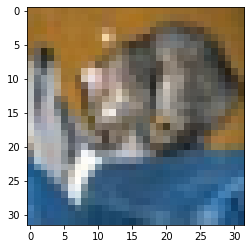

In [ ]:
# Set the index of the image in test set for which the output must be predicted
# Valid ind values range is: 0, 1, 2, ... 9999
ind = 0
plt.imshow((x_test[ind]*std + mean).astype(np.uint8))

In [ ]:
pred = model.predict(x_test[ind].reshape(1,32,32,3))
print('The pridicted probability different classes is')
print(pred)
print('The predicted class is', pred.argmax(), class_labels[pred.argmax()])
print('The actual class is', y_test[ind].argmax(), class_labels[y_test[ind].argmax()])

The pridicted probability different classes is
[[0.00853586 0.00370927 0.09454114 0.4438077  0.02417964 0.3550486
  0.05319165 0.00748837 0.008368   0.00112979]]
The predicted class is 3 Cat
The actual class is 3 Cat


## Loss and Accuracy Curves

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
x_axis = range(1, len(train_loss)+1)

Text(0.5, 1.0, 'Loss Curve')

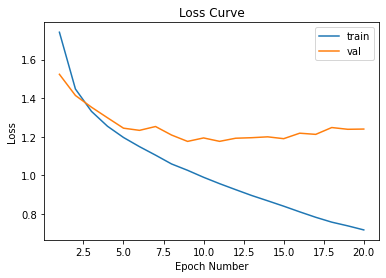

In [ ]:
plt.plot(x_axis, train_loss, label='train')
plt.plot(x_axis, val_loss, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

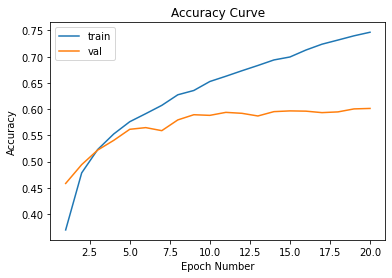

In [ ]:
plt.plot(x_axis, train_acc, label='train')
plt.plot(x_axis, val_acc, label='val')
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

## Additional Evaluation Metrics
### (Precision, Recall, Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.66      0.65      0.66      1000
     Class 1       0.71      0.69      0.70      1000
     Class 2       0.53      0.47      0.50      1000
     Class 3       0.43      0.37      0.40      1000
     Class 4       0.59      0.38      0.46      1000
     Class 5       0.47      0.53      0.50      1000
     Class 6       0.56      0.77      0.65      1000
     Class 7       0.67      0.66      0.66      1000
     Class 8       0.70      0.73      0.72      1000
     Class 9       0.61      0.64      0.62      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



In [ ]:
cnf_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(cnf_matrix)

[[653  38  52  11  18  12  28  14 118  56]
 [ 40 693   5  11  11   8  18   6  52 156]
 [ 68  13 475  83  66  93 116  46  22  18]
 [ 24  10  63 374  47 244 144  34  15  45]
 [ 35   9 128  71 384  80 153 111  18  11]
 [ 15   4  69 176  33 534  74  63  12  20]
 [  8  10  56  49  27  34 770  16  10  20]
 [ 18   6  18  50  50 117  28 656  12  45]
 [ 82  60  15  20  11   8  10  10 735  49]
 [ 40 130   9  31   5  17  41  28  55 644]]
